In [ ]:
 from prophet import Prophet
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse
import statsmodels as sm
import datetime as dt
import seaborn as sns
import math
from pandas.plotting import autocorrelation_plot
!pip install pmdarima
import pmdarima as pmd
from sklearn.model_selection import train_test_split
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# df =pd.read_excel("/content/Opmt 620.xlsx")
exhibit = pd.read_excel("/content/Opmt 620.xlsx", sheet_name="Exhibit 1")
beer = pd.read_excel("/content/Opmt 620.xlsx", sheet_name="CraftBeer")
whiskey = pd.read_excel("/content/Opmt 620.xlsx", sheet_name="Whiskey")
wine = pd.read_excel("/content/Opmt 620.xlsx", sheet_name="WhiteWine")

In [ ]:
df.head()
df.tail()

,Unnamed: 0,Unnamed: 1
6,Last Revised:,2021-05-13 00:00:00
7,NaN,NaN
8,"No part of this file may be reproduced, stored...",NaN
9,NaN,NaN
10,© 2021 Ivey Business School Foundation,NaN


In [ ]:
beer.head()

,Year,Month,Relative Interest
0,2010,1,6
1,2010,2,9
2,2010,3,15
3,2010,4,12
4,2010,5,17


In [ ]:
beer.dtypes

Year                 int64
Month                int64
Relative Interest    int64
dtype: object

In [ ]:
cols=["Year","Month"]
beer['date'] =beer[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
beer.head()

,Year,Month,Relative Interest,date
0,2010,1,6,2010-1
1,2010,2,9,2010-2
2,2010,3,15,2010-3
3,2010,4,12,2010-4
4,2010,5,17,2010-5


In [ ]:
beer = beer.rename(columns={
    'date': 'ds',
    'Relative Interest': 'y'
})
beer.head()

,Year,Month,y,ds
0,2010,1,6,2010-1
1,2010,2,9,2010-2
2,2010,3,15,2010-3
3,2010,4,12,2010-4
4,2010,5,17,2010-5


In [ ]:
beer['ds']=pd.to_datetime(beer['ds'])
#Convert the month column to datetime

In [ ]:
beer.dtypes

Year              int64
Month             int64
y                 int64
ds       datetime64[ns]
dtype: object

In [ ]:
df_beer=beer.drop(['Year','Month'], axis=1)

In [ ]:
df_beer.head()

,y,ds
0,6,2010-01-01
1,9,2010-02-01
2,15,2010-03-01
3,12,2010-04-01
4,17,2010-05-01


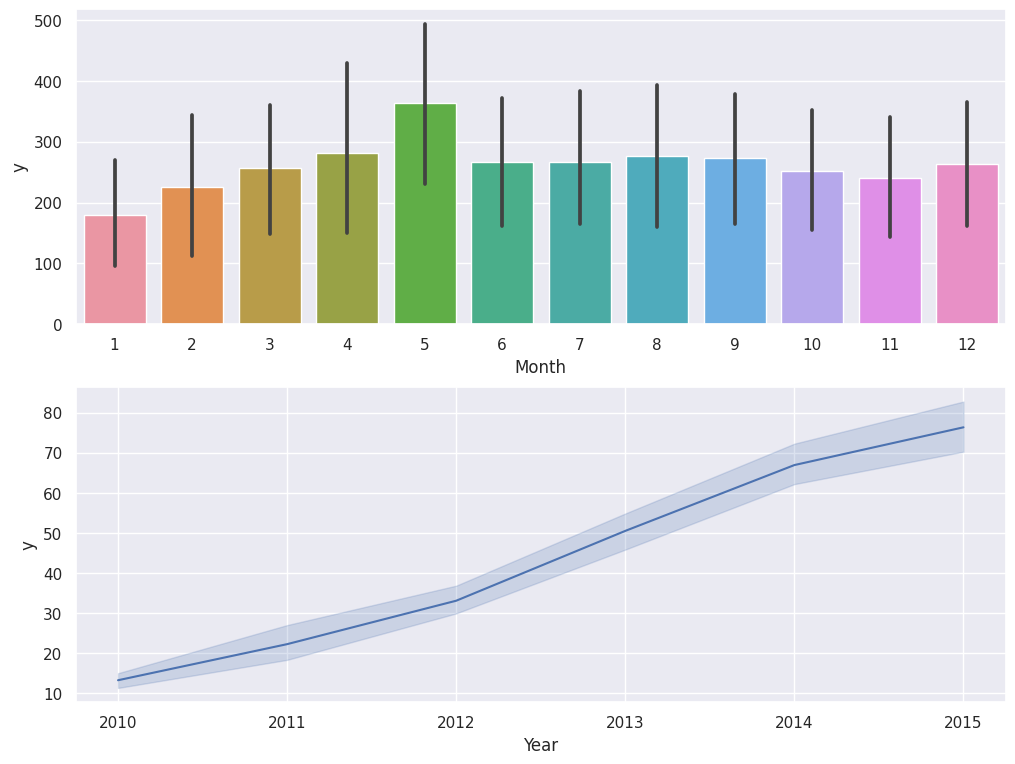

In [ ]:
plt.figure(figsize=(12,9))
sns.set_theme()
plt.subplot(2,1,1)
sns.barplot(data=beer,x='Month',y='y',estimator=np.sum)
plt.subplot(2,1,2)
sns.lineplot(data=beer,x='Year',y='y')
plt.show()

Text(0.5, 1.0, 'Date vs Relative Interest For BEER')

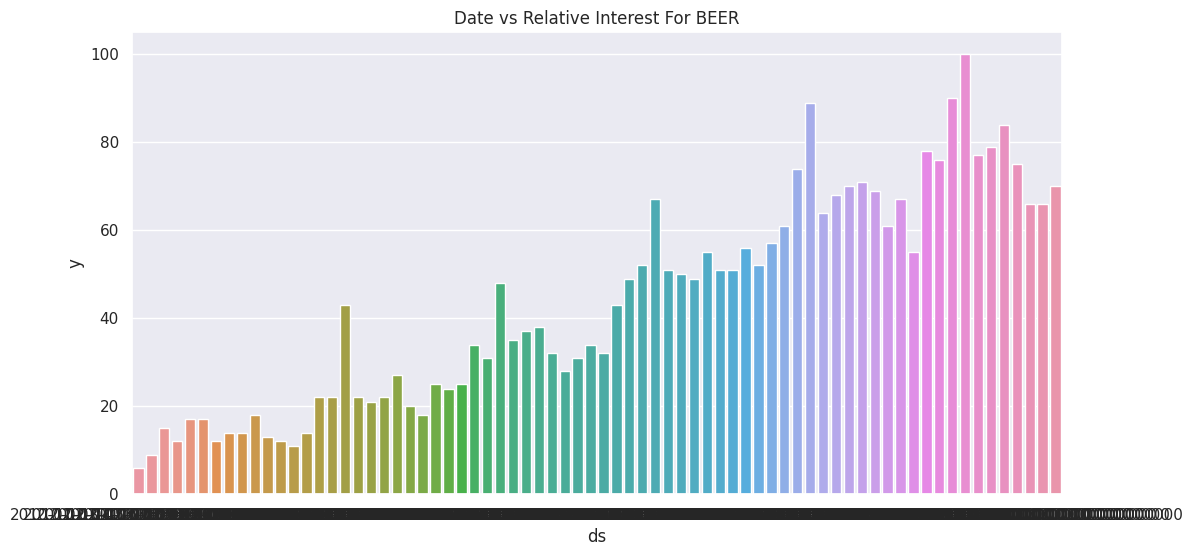

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="ds",y="y",data=df_beer)
plt.title('Date vs Relative Interest For BEER')

Text(0, 0.5, ' Beer Relative Interest')

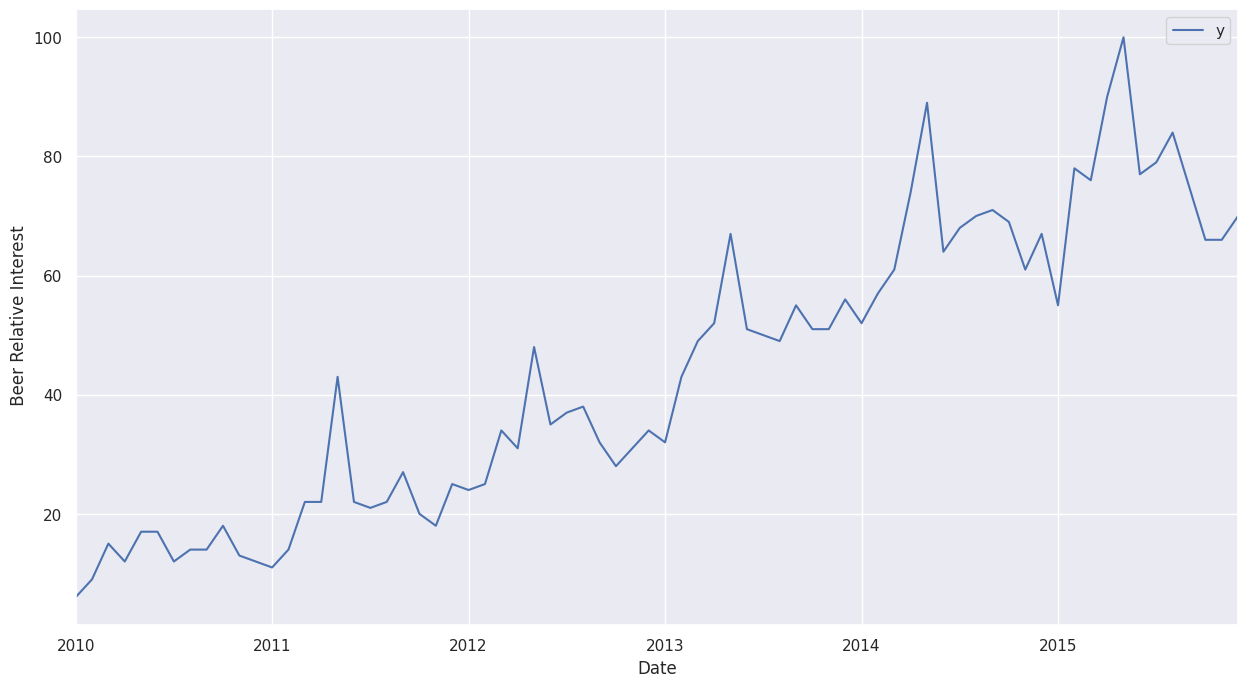

In [ ]:
df_beer.set_index('ds').plot(figsize=(15, 8))
plt.xlabel('Date')
plt.ylabel(' Beer Relative Interest')

In [ ]:
train_beer = df_beer[:60]
test_beer = df_beer[-12:]

In [ ]:
train_beer.head()

,y,ds
0,6,2010-01-01
1,9,2010-02-01
2,15,2010-03-01
3,12,2010-04-01
4,17,2010-05-01


In [ ]:
train_beer.tail()

,y,ds
55,70,2014-08-01
56,71,2014-09-01
57,69,2014-10-01
58,61,2014-11-01
59,67,2014-12-01


In [ ]:
test_beer.head()

,y,ds
60,55,2015-01-01
61,78,2015-02-01
62,76,2015-03-01
63,90,2015-04-01
64,100,2015-05-01


In [ ]:
test_beer.tail()

,y,ds
67,84,2015-08-01
68,75,2015-09-01
69,66,2015-10-01
70,66,2015-11-01
71,70,2015-12-01


In [ ]:
m_beer = Prophet()
m_beer.fit(train_beer)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjh6vhgqu/w4i244ao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjh6vhgqu/mdy0o12e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1268', 'data', 'file=/tmp/tmpjh6vhgqu/w4i244ao.json', 'init=/tmp/tmpjh6vhgqu/mdy0o12e.json', 'output', 'file=/tmp/tmpjh6vhgqu/prophet_model36fnyv4d/prophet_model-20231027094326.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:43:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:43:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_beer = m_beer.make_future_dataframe(periods=12, freq='MS',include_history=False)
future_beer

,ds
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


In [ ]:
forecast_beer= m_beer.predict(future_beer)

In [ ]:
print(forecast_beer.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [ ]:
forecast_beer[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-01,69.953541,66.083080,74.078530
1,2015-02-01,73.360390,69.630851,77.009206
2,2015-03-01,80.779250,76.854662,84.781146
3,2015-04-01,85.155719,81.170009,88.872721
4,2015-05-01,100.343183,96.287181,104.365109


In [ ]:
forecast_beer[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7,2015-08-01,83.427577,79.547529,87.592097
8,2015-09-01,88.350222,84.312793,92.025245
9,2015-10-01,85.841452,82.126894,89.778720
10,2015-11-01,80.372639,76.413950,84.328928
11,2015-12-01,86.070964,82.023872,89.854362


In [ ]:
test_beer

,y,ds
60,55,2015-01-01
61,78,2015-02-01
62,76,2015-03-01
63,90,2015-04-01
64,100,2015-05-01
65,77,2015-06-01
66,79,2015-07-01
67,84,2015-08-01
68,75,2015-09-01
69,66,2015-10-01


In [ ]:
yhat_beer=forecast_beer['yhat']
yhat_beer

0      69.953541
1      73.360390
2      80.779250
3      85.155719
4     100.343183
5      83.080887
6      81.736248
7      83.427577
8      88.350222
9      85.841452
10     80.372639
11     86.070964
Name: yhat, dtype: float64

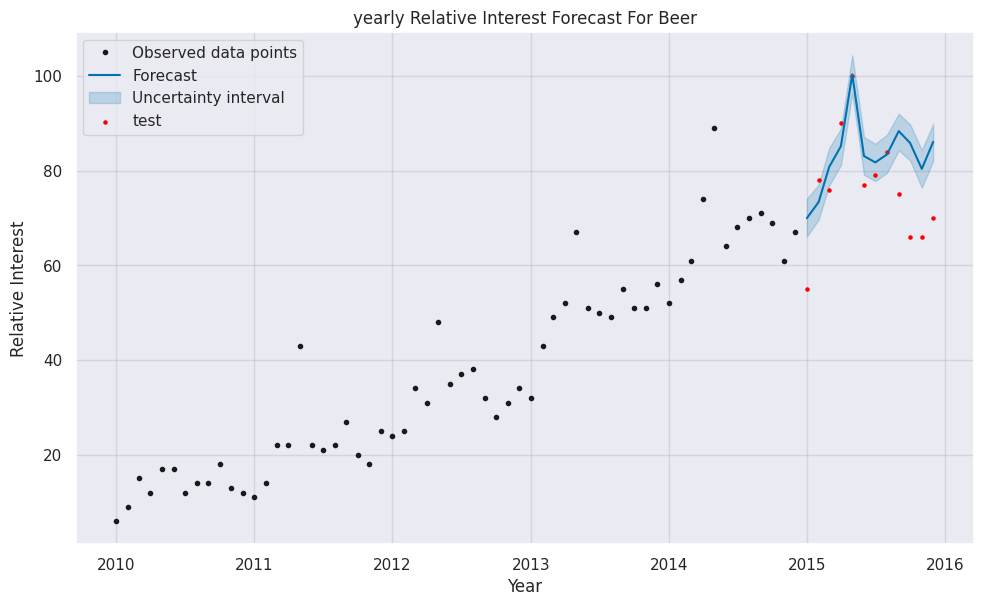

In [ ]:
m_beer.plot(forecast_beer)
plt.scatter(test_beer['ds'], test_beer['y'], color = 'red', s = 5, label = 'test')
plt.title('yearly Relative Interest Forecast For Beer')
plt.xlabel('Year')
plt.ylabel('Relative Interest')
plt.legend()
plt.show()

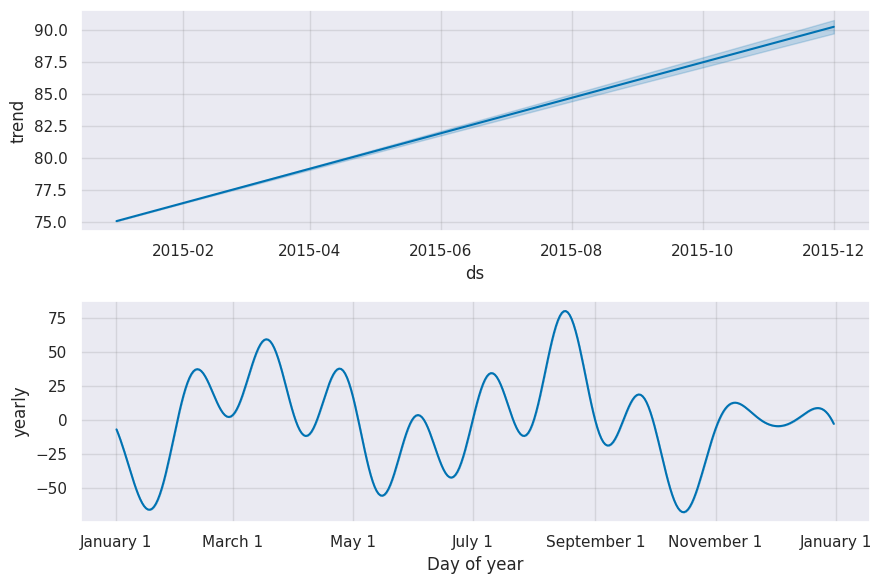

In [ ]:
fig_components_beer = m_beer.plot_components(forecast_beer)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m_beer, forecast_beer)

In [ ]:
plot_components_plotly(m_beer, forecast_beer)


In [ ]:
WHISKEY.


In [ ]:
whiskey.head()

,Year,Month,Relative Interest
0,2010,1,41
1,2010,2,42
2,2010,3,44
3,2010,4,41
4,2010,5,39


In [ ]:
whiskey.dtypes

Year                 int64
Month                int64
Relative Interest    int64
dtype: object

In [65]:
cols=["Year","Month"]
whiskey['date'] =whiskey[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
whiskey.head()

,Year,Month,Relative Interest,date
0,2010,1,41,2010-1
1,2010,2,42,2010-2
2,2010,3,44,2010-3
3,2010,4,41,2010-4
4,2010,5,39,2010-5


In [66]:
whiskey = whiskey.rename(columns={
    'date': 'ds',
    'Relative Interest': 'y'
})
whiskey.head()

,Year,Month,y,ds
0,2010,1,41,2010-1
1,2010,2,42,2010-2
2,2010,3,44,2010-3
3,2010,4,41,2010-4
4,2010,5,39,2010-5


In [67]:
whiskey['ds']=pd.to_datetime(whiskey['ds'])
#Convert the month column to datetime

In [68]:
whiskey.dtypes

Year              int64
Month             int64
y                 int64
ds       datetime64[ns]
dtype: object

In [69]:
df_whiskey=whiskey.drop(['Year','Month'], axis=1)

In [71]:
df_whiskey.head()

,y,ds
0,41,2010-01-01
1,42,2010-02-01
2,44,2010-03-01
3,41,2010-04-01
4,39,2010-05-01


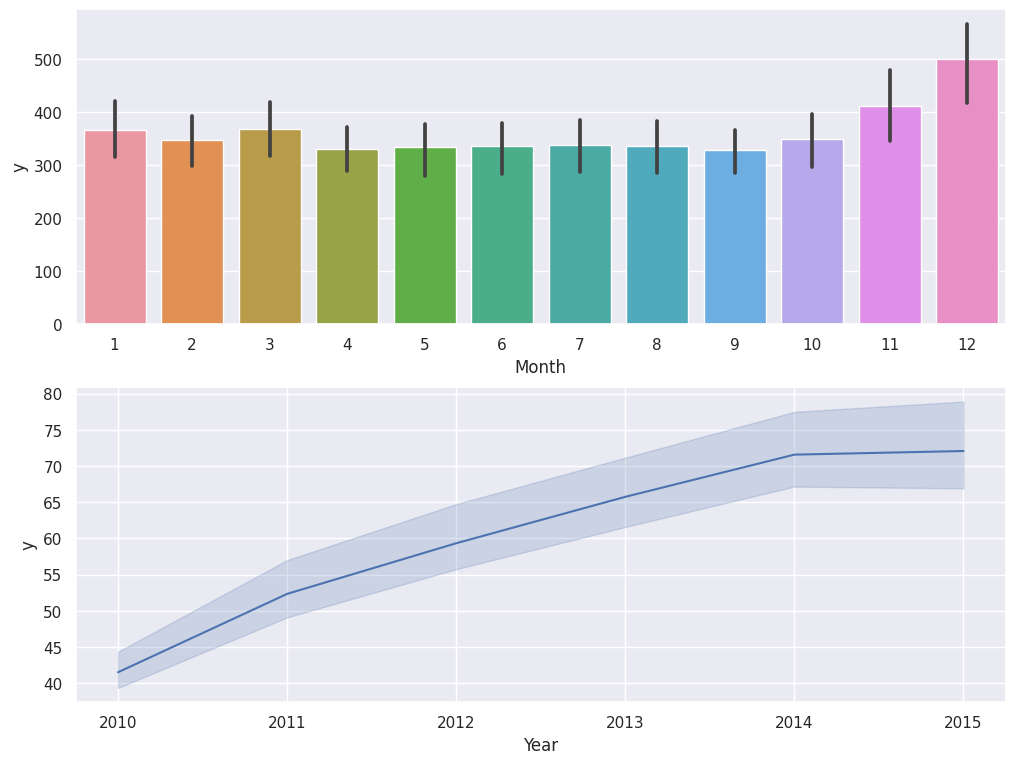

In [72]:
plt.figure(figsize=(12,9))
sns.set_theme()
plt.subplot(2,1,1)
sns.barplot(data=whiskey,x='Month',y='y',estimator=np.sum)
plt.subplot(2,1,2)
sns.lineplot(data=whiskey,x='Year',y='y')
plt.show()

Text(0.5, 1.0, 'Date vs Relative Interest For WHISKEY')

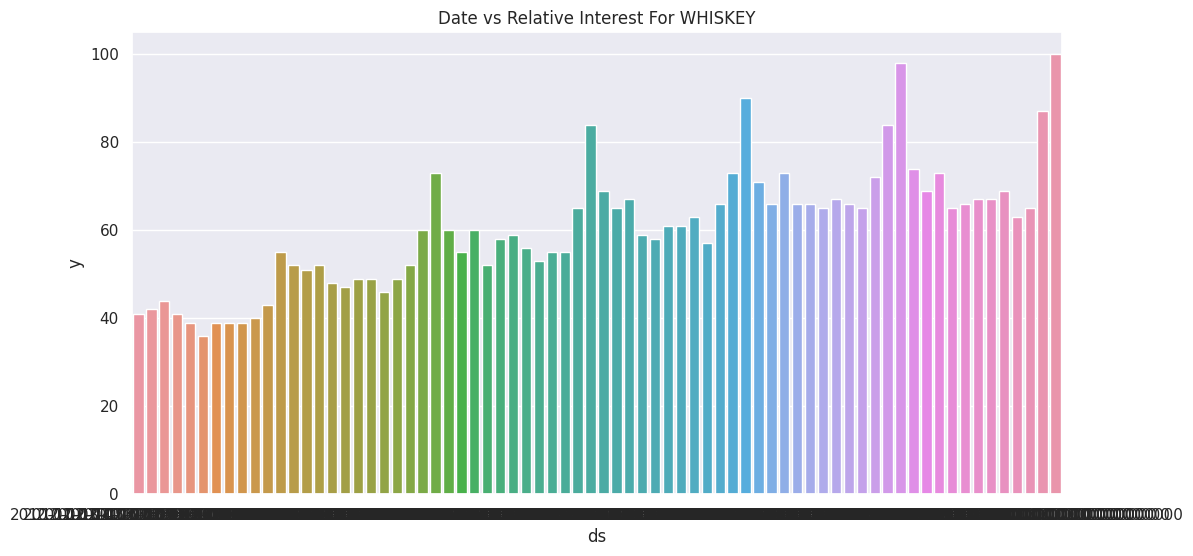

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(x="ds",y="y",data=df_whiskey)
plt.title('Date vs Relative Interest For WHISKEY')

Text(0, 0.5, ' Whiskey Relative Interest')

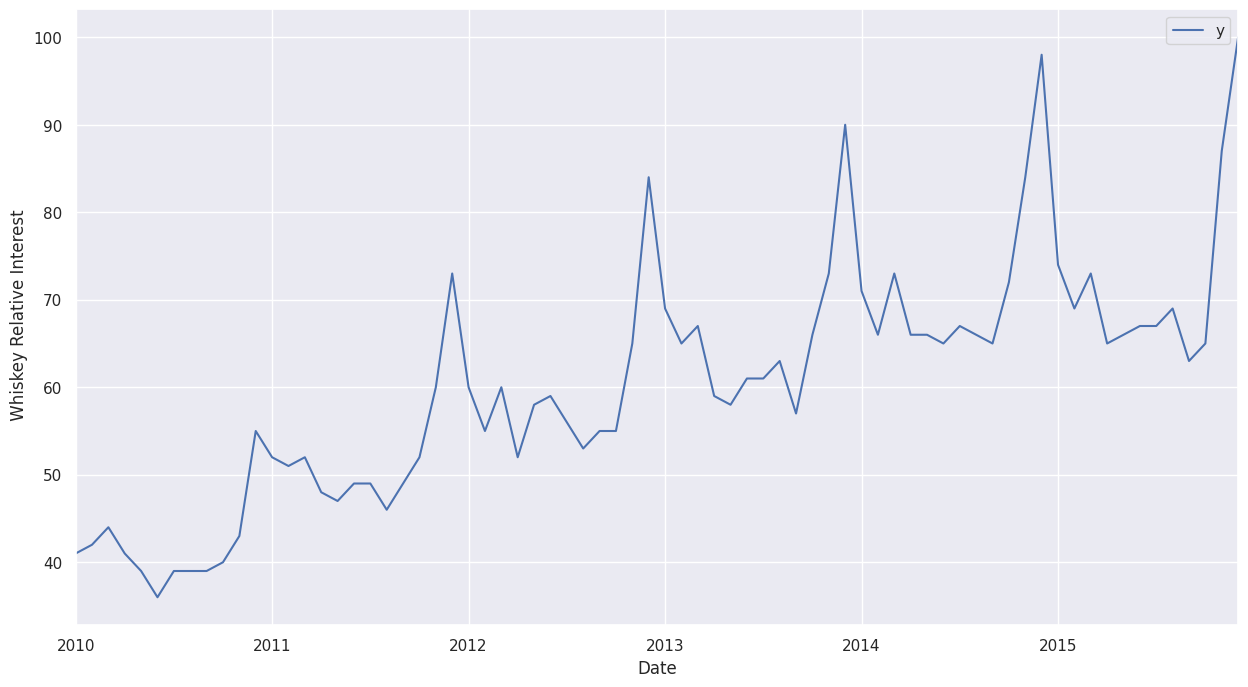

In [74]:
df_whiskey.set_index('ds').plot(figsize=(15, 8))
plt.xlabel('Date')
plt.ylabel(' Whiskey Relative Interest')

In [75]:
train_whiskey = df_whiskey[:60]
test_whiskey = df_whiskey[-12:]

In [76]:
train_whiskey.head()

,y,ds
0,41,2010-01-01
1,42,2010-02-01
2,44,2010-03-01
3,41,2010-04-01
4,39,2010-05-01


In [77]:
test_whiskey.head()

,y,ds
60,74,2015-01-01
61,69,2015-02-01
62,73,2015-03-01
63,65,2015-04-01
64,66,2015-05-01


In [78]:
test_whiskey

,y,ds
60,74,2015-01-01
61,69,2015-02-01
62,73,2015-03-01
63,65,2015-04-01
64,66,2015-05-01
65,67,2015-06-01
66,67,2015-07-01
67,69,2015-08-01
68,63,2015-09-01
69,65,2015-10-01


In [79]:
m_wh = Prophet()
m_wh.fit(train_whiskey)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjh6vhgqu/4vrc122d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjh6vhgqu/rzrz4ttd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97024', 'data', 'file=/tmp/tmpjh6vhgqu/4vrc122d.json', 'init=/tmp/tmpjh6vhgqu/rzrz4ttd.json', 'output', 'file=/tmp/tmpjh6vhgqu/prophet_modeljn8es1hi/prophet_model-20231027101026.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [80]:
future_wh = m_wh.make_future_dataframe(periods=12, freq='MS',include_history=False)
future_wh

,ds
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


In [81]:
forecast_wh = m_wh.predict(future_wh)

In [82]:
print(forecast_wh.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [83]:
forecast_wh[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7,2015-08-01,73.596103,70.213600,76.660988
8,2015-09-01,74.222556,70.686815,77.374452
9,2015-10-01,78.729671,75.391788,81.753520
10,2015-11-01,85.919541,82.649526,88.990255
11,2015-12-01,97.761770,94.560114,100.722307


In [84]:
yhat_wh=forecast_wh['yhat']
yhat_wh

0     79.706554
1     76.671253
2     80.471621
3     76.309686
4     73.424909
5     73.008128
6     75.036857
7     73.596103
8     74.222556
9     78.729671
10    85.919541
11    97.761770
Name: yhat, dtype: float64

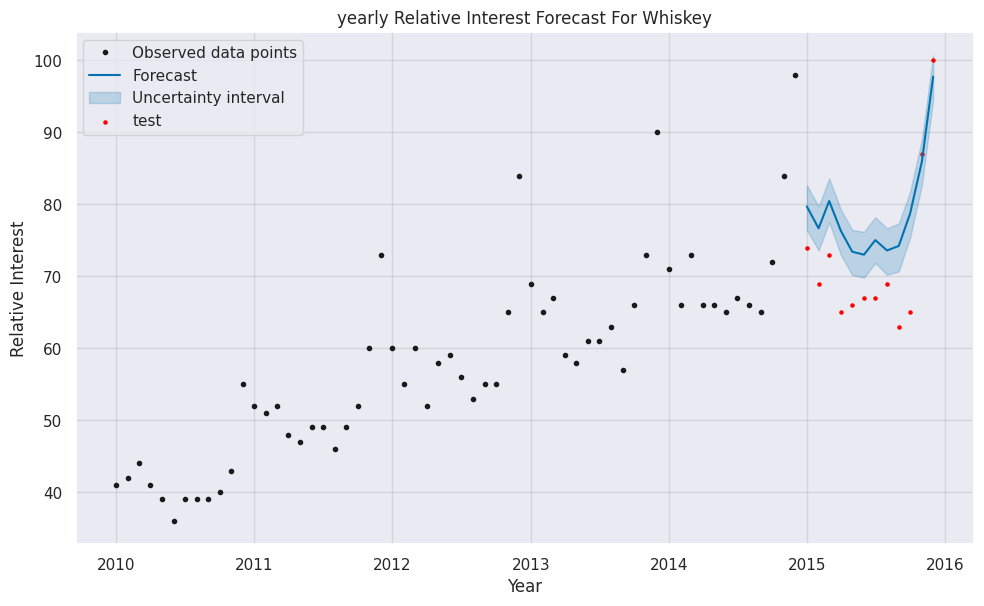

In [85]:
m_wh.plot(forecast_wh)
## Your code added here
plt.scatter(test_whiskey['ds'], test_whiskey['y'], color = 'red', s = 5, label = 'test')
plt.title('yearly Relative Interest Forecast For Whiskey')
plt.xlabel('Year')
plt.ylabel('Relative Interest')
plt.legend()
plt.show()

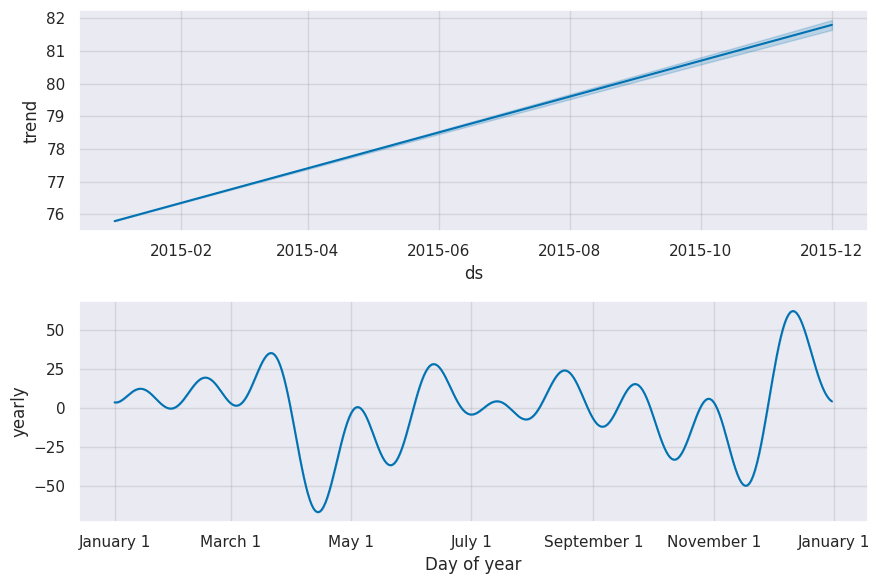

In [86]:
fig_components = m_wh.plot_components(forecast_wh)

In [87]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m_wh, forecast_wh)

In [88]:
plot_components_plotly(m_wh, forecast_wh)


In [ ]:
WHITE WHINE

In [89]:
wine.head()

,Year,Month,Relative Interest
0,2010,1,54
1,2010,2,54
2,2010,3,58
3,2010,4,52
4,2010,5,61


In [90]:
wine.dtypes

Year                 int64
Month                int64
Relative Interest    int64
dtype: object

In [91]:
cols=["Year","Month"]
wine['date'] =wine[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
wine.head()

,Year,Month,Relative Interest,date
0,2010,1,54,2010-1
1,2010,2,54,2010-2
2,2010,3,58,2010-3
3,2010,4,52,2010-4
4,2010,5,61,2010-5


In [92]:
wine = wine.rename(columns={
    'date': 'ds',
    'Relative Interest': 'y'
})
wine.head()

,Year,Month,y,ds
0,2010,1,54,2010-1
1,2010,2,54,2010-2
2,2010,3,58,2010-3
3,2010,4,52,2010-4
4,2010,5,61,2010-5


In [93]:
wine['ds']=pd.to_datetime(wine['ds'])
#Convert the month column to datetime

In [94]:
wine.dtypes

Year              int64
Month             int64
y                 int64
ds       datetime64[ns]
dtype: object

In [95]:
df_wine=wine.drop(['Year','Month'], axis=1)

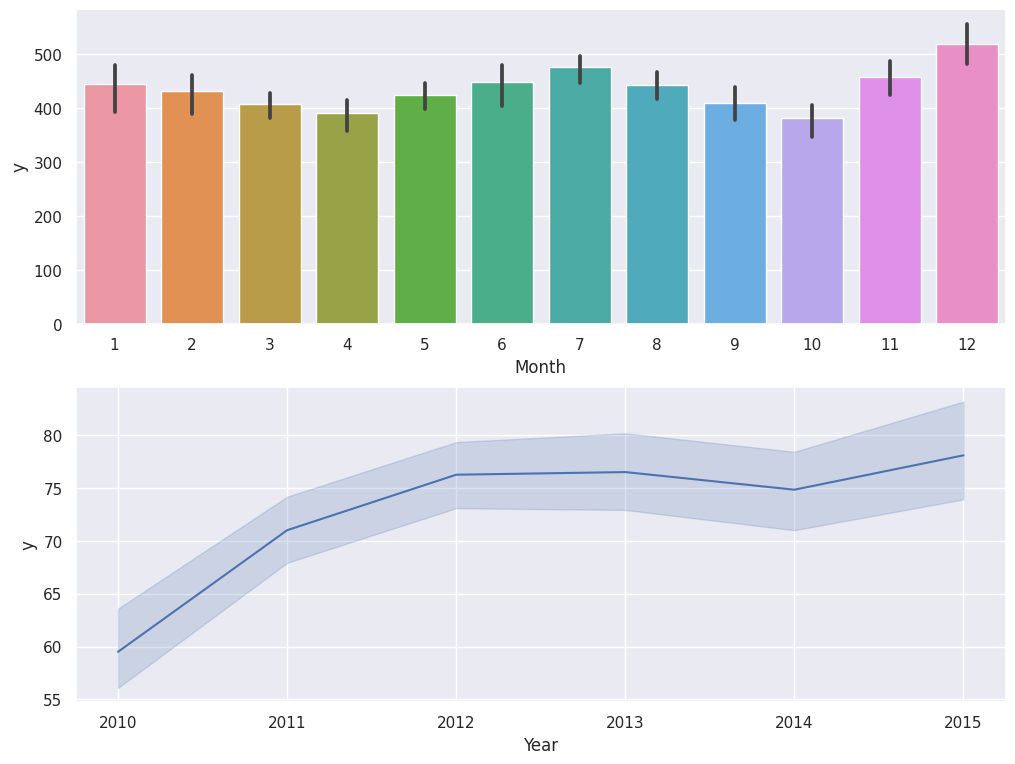

In [96]:
plt.figure(figsize=(12,9))
sns.set_theme()
plt.subplot(2,1,1)
sns.barplot(data=wine,x='Month',y='y',estimator=np.sum)
plt.subplot(2,1,2)
sns.lineplot(data=wine,x='Year',y='y')
plt.show()

Text(0.5, 1.0, 'Date vs Relative Interest For WHITE WHINE')

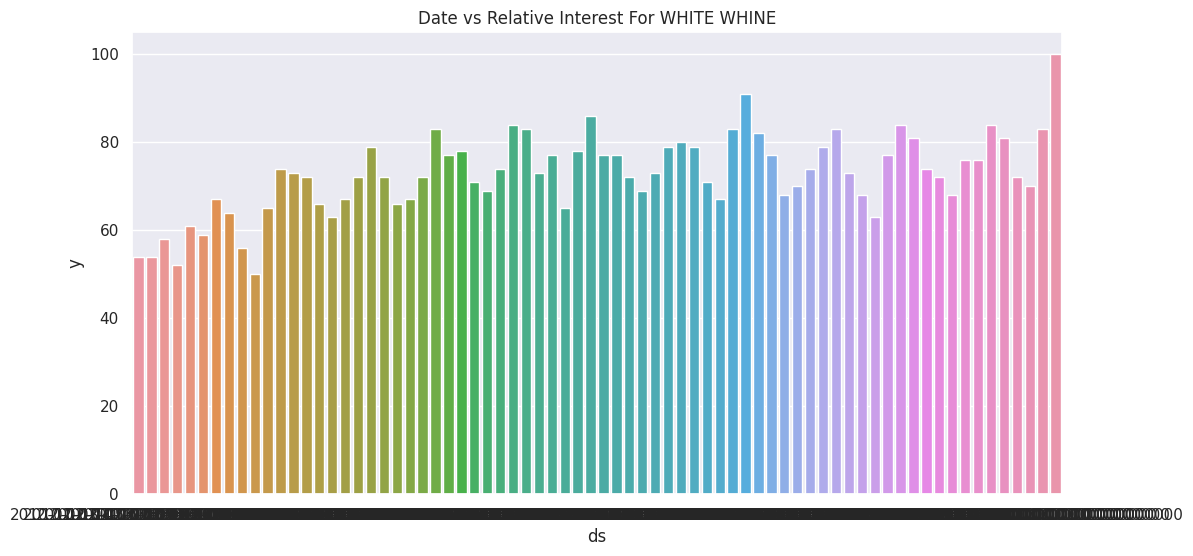

In [97]:
plt.figure(figsize=(12,6))
sns.barplot(x="ds",y="y",data=df_wine)
plt.title('Date vs Relative Interest For WHITE WHINE')

Text(0, 0.5, ' White Wine Relative Interest')

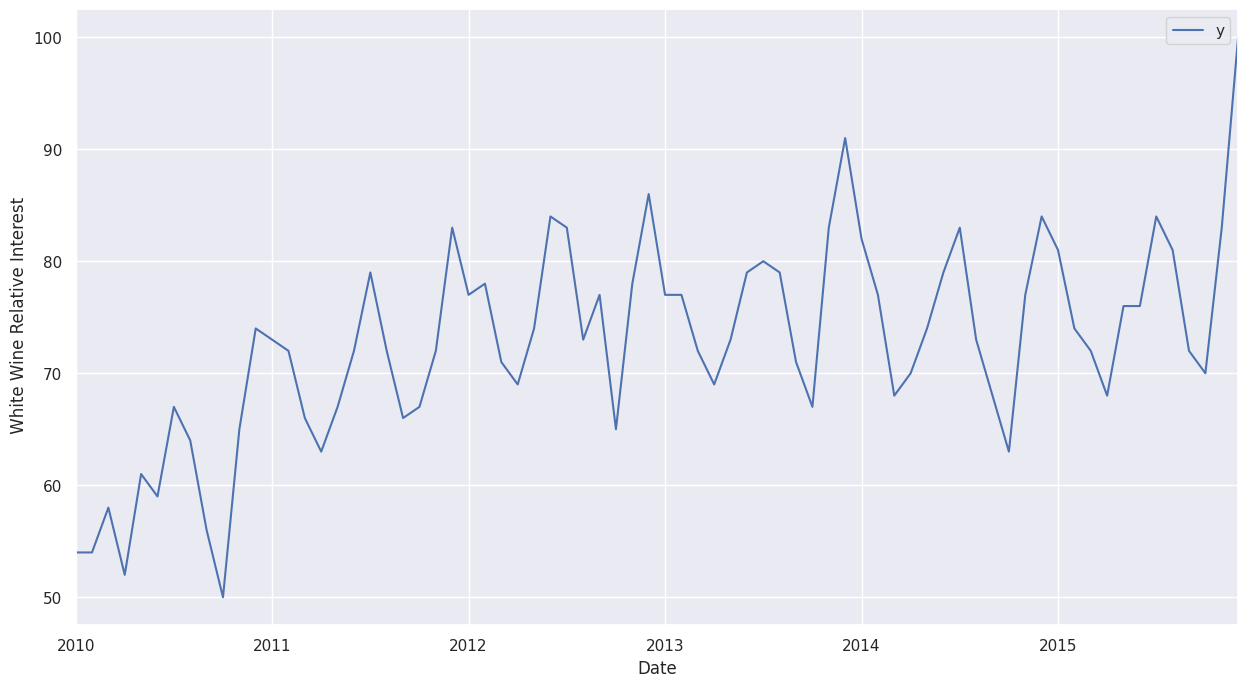

In [98]:
df_wine.set_index('ds').plot(figsize=(15, 8))
plt.xlabel('Date')
plt.ylabel(' White Wine Relative Interest')

<ipython-input-99-cae9ad92c0cc>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-99-cae9ad92c0cc>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-99-cae9ad92c0cc>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



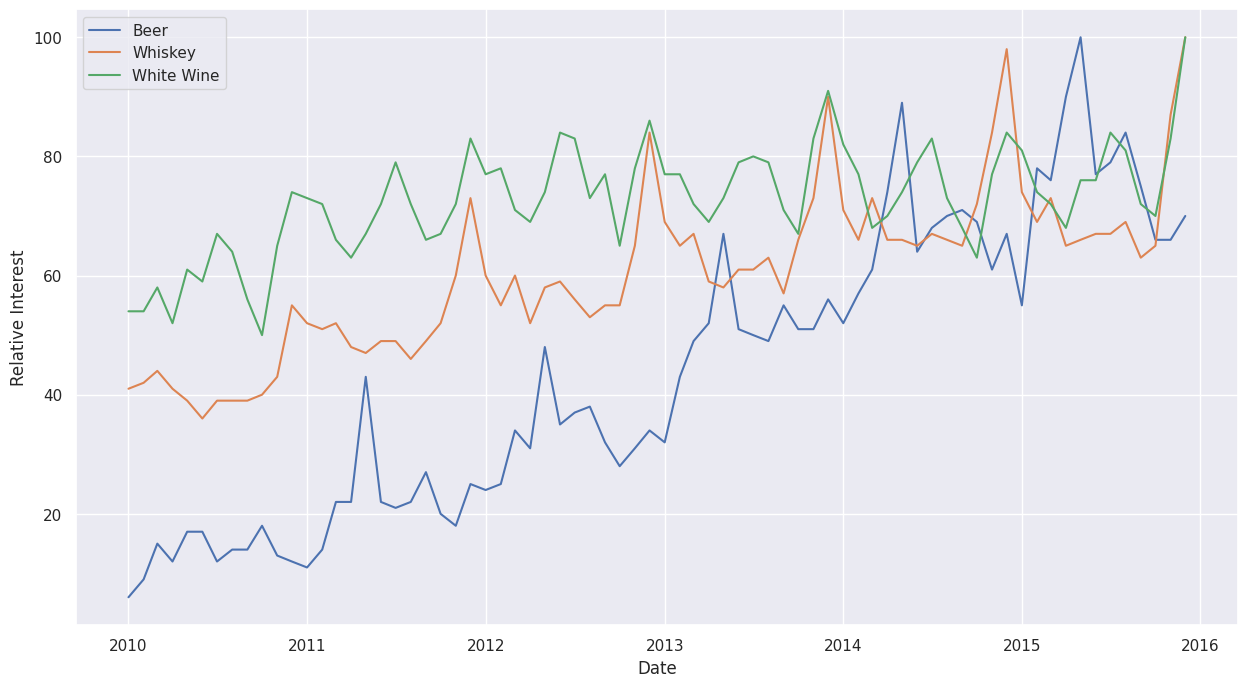

In [99]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'ds', y = 'y', data = beer, estimator = np.average,palette="husl", label="Beer")
sns.lineplot(x = 'ds', y = 'y', data = whiskey, estimator = np.average ,palette="husl", label="Whiskey")
sns.lineplot(x = 'ds', y = 'y', data = wine, estimator = np.average ,palette="husl", label="White Wine")
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.show()

In [100]:
df_wine.head()

,y,ds
0,54,2010-01-01
1,54,2010-02-01
2,58,2010-03-01
3,52,2010-04-01
4,61,2010-05-01


In [101]:
train_wine = df_wine[:60]
test_wine = df_wine[-12:]

In [102]:
train_wine.head

<bound method NDFrame.head of      y         ds
0   54 2010-01-01
1   54 2010-02-01
2   58 2010-03-01
3   52 2010-04-01
4   61 2010-05-01
5   59 2010-06-01
6   67 2010-07-01
7   64 2010-08-01
8   56 2010-09-01
9   50 2010-10-01
10  65 2010-11-01
11  74 2010-12-01
12  73 2011-01-01
13  72 2011-02-01
14  66 2011-03-01
15  63 2011-04-01
16  67 2011-05-01
17  72 2011-06-01
18  79 2011-07-01
19  72 2011-08-01
20  66 2011-09-01
21  67 2011-10-01
22  72 2011-11-01
23  83 2011-12-01
24  77 2012-01-01
25  78 2012-02-01
26  71 2012-03-01
27  69 2012-04-01
28  74 2012-05-01
29  84 2012-06-01
30  83 2012-07-01
31  73 2012-08-01
32  77 2012-09-01
33  65 2012-10-01
34  78 2012-11-01
35  86 2012-12-01
36  77 2013-01-01
37  77 2013-02-01
38  72 2013-03-01
39  69 2013-04-01
40  73 2013-05-01
41  79 2013-06-01
42  80 2013-07-01
43  79 2013-08-01
44  71 2013-09-01
45  67 2013-10-01
46  83 2013-11-01
47  91 2013-12-01
48  82 2014-01-01
49  77 2014-02-01
50  68 2014-03-01
51  70 2014-04-01
52  74 2014-05-0

In [103]:
test_wine

,y,ds
60,81,2015-01-01
61,74,2015-02-01
62,72,2015-03-01
63,68,2015-04-01
64,76,2015-05-01
65,76,2015-06-01
66,84,2015-07-01
67,81,2015-08-01
68,72,2015-09-01
69,70,2015-10-01


In [104]:
m_w = Prophet()
m_w.fit(train_wine)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjh6vhgqu/ymfv0k5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjh6vhgqu/6z07o2hn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98039', 'data', 'file=/tmp/tmpjh6vhgqu/ymfv0k5e.json', 'init=/tmp/tmpjh6vhgqu/6z07o2hn.json', 'output', 'file=/tmp/tmpjh6vhgqu/prophet_model6i1ecaq2/prophet_model-20231027102340.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:23:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:23:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [105]:
future_w = m_w.make_future_dataframe(periods=12, freq='MS',include_history=False)
future_w

,ds
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


In [106]:
forecast_w = m_w.predict(future_w)

In [107]:
print(forecast_w.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [108]:
forecast_w[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7,2015-08-01,76.111148,73.334406,79.017666
8,2015-09-01,66.713288,63.922976,69.655334
9,2015-10-01,65.611858,62.693316,68.293688
10,2015-11-01,74.059494,71.296885,76.951645
11,2015-12-01,82.757386,79.884798,85.665555


In [109]:
yhat_w=forecast_w['yhat']
yhat_w

0     78.168626
1     76.722502
2     71.074486
3     68.093657
4     73.143461
5     74.713306
6     82.496304
7     76.111148
8     66.713288
9     65.611858
10    74.059494
11    82.757386
Name: yhat, dtype: float64

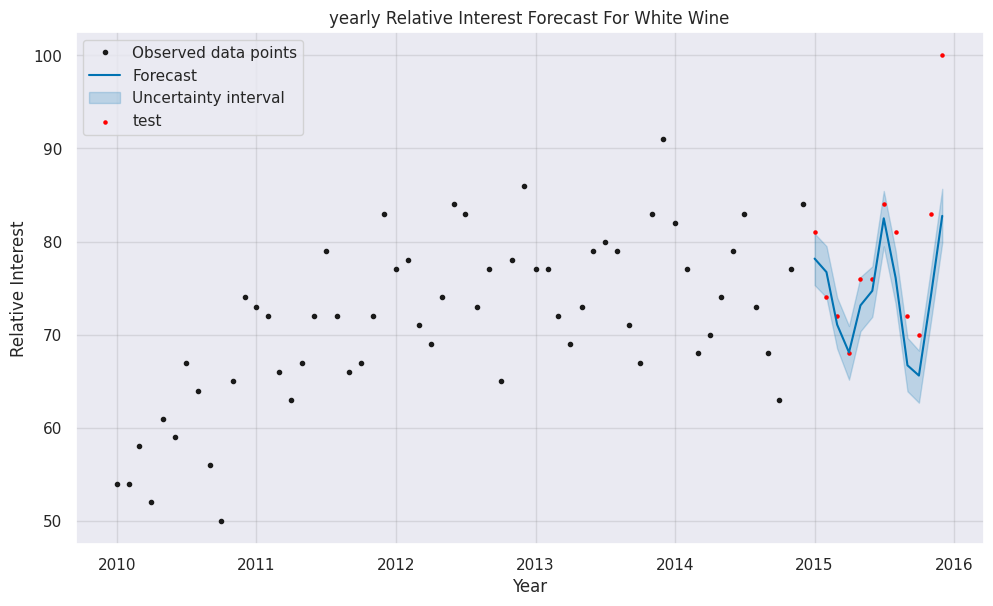

In [110]:
m_w.plot(forecast_w)
## Your code added here
plt.scatter(test_wine['ds'], test_wine['y'], color = 'red', s = 5, label = 'test')
plt.title('yearly Relative Interest Forecast For White Wine')
plt.xlabel('Year')
plt.ylabel('Relative Interest')
plt.legend()
plt.show()

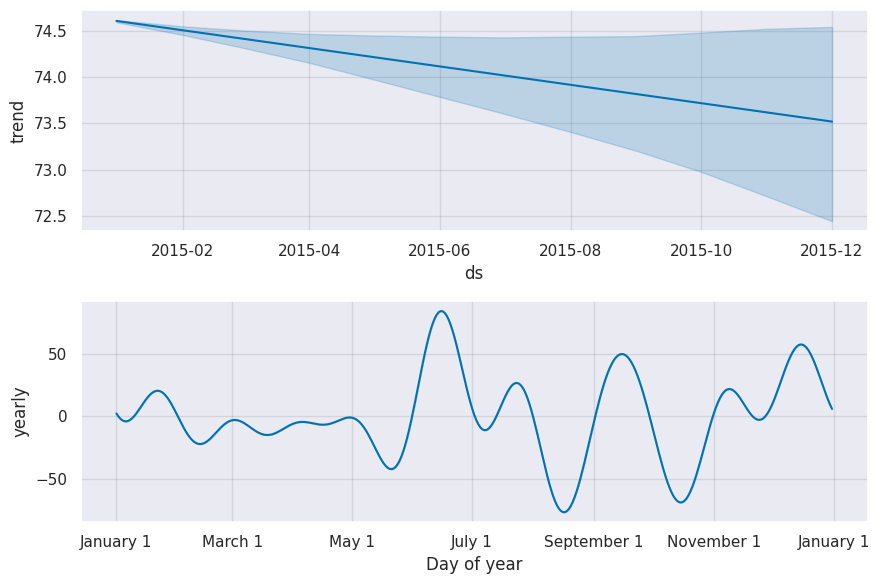

In [111]:
fig_components = m_w.plot_components(forecast_w)

In [112]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m_w, forecast_w)

In [113]:
plot_components_plotly(m_w, forecast_w)


In [ ]:
Baseline methods for the beer

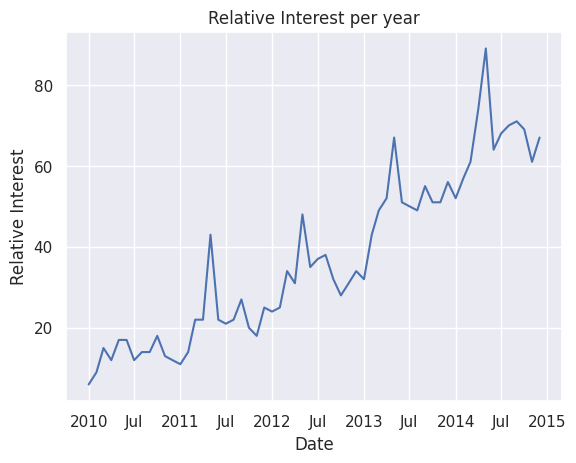

In [114]:

locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)


plt.plot(train_beer['ds'], train_beer['y'])
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.title('Relative Interest per year')
plt.show()



Text(0.5, 1.0, 'Autocorrelation Plot')

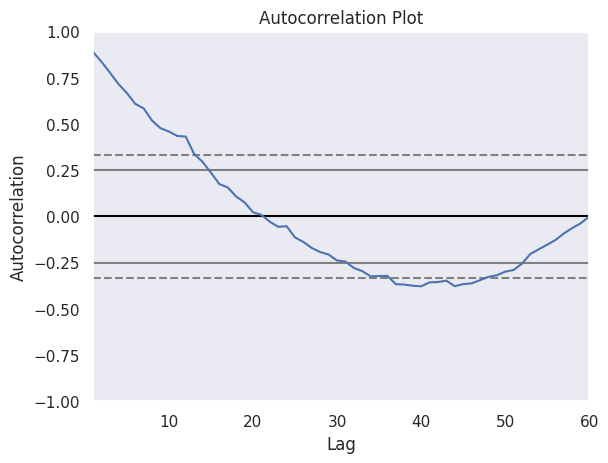

In [115]:
from pandas.plotting import autocorrelation_plot
data = np.array(train_beer['y'])
autocorrelation_plot(data)
## Your code to add a title here:
plt.title('Autocorrelation Plot')

In [116]:
pred = pd.DataFrame(test_beer['ds'])
pred = pred.reset_index(drop = True)
h_max=12
m=12
T = len(train_beer)
yT = train_beer['y'][len(train_beer) - 1]
y1 = train_beer['y'][0]
pred['mean_baseline'] = train_beer['y'].mean()
pred['naive_baseline'] = yT
print(yT,y1,h_max,m)

67 6 12 12


In [117]:
pred_list = []
for h in range(1, h_max + 1):
  k = math.floor((h - 1)/m)
  index = T + h - m * (k + 1)
  pred_list.append(beer['y'][index - 1])
pred['seasonal_naive_baseline'] = pred_list
pred_list

[52, 57, 61, 74, 89, 64, 68, 70, 71, 69, 61, 67]

In [118]:
drift_list = []
for h in range(1, h_max+1):
  result = yT + h * ((yT-y1) / T-1)
  drift_list.append(result)
pred['drift_baseline'] = drift_list
drift_list

[67.01666666666667,
 67.03333333333333,
 67.05,
 67.06666666666666,
 67.08333333333333,
 67.1,
 67.11666666666666,
 67.13333333333333,
 67.15,
 67.16666666666667,
 67.18333333333334,
 67.2]

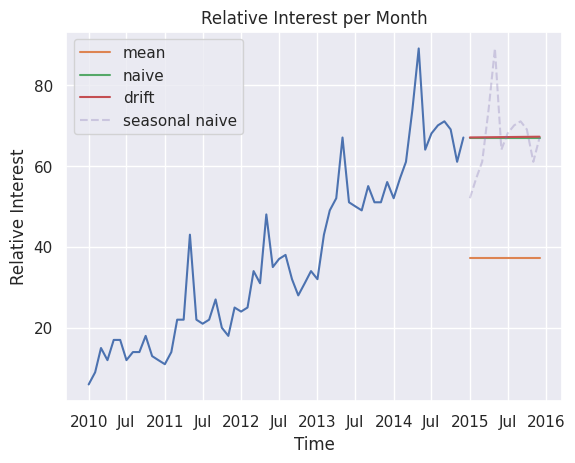

In [119]:
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)


plt.plot(train_beer['ds'], train_beer['y'])
plt.plot(pred['ds'], pred['mean_baseline'], label = 'mean')
plt.plot(pred['ds'], pred['naive_baseline'], label = 'naive')
plt.plot(pred['ds'], pred['drift_baseline'], label = 'drift')
plt.plot(pred['ds'], pred['seasonal_naive_baseline'], label = 'seasonal naive', linestyle = '--', alpha = 0.3)
plt.xlabel('Time')
plt.ylabel('Relative Interest')
plt.title('Relative Interest per Month')
plt.legend()
plt.show()

In [ ]:
Baseline Methods For Whiskey

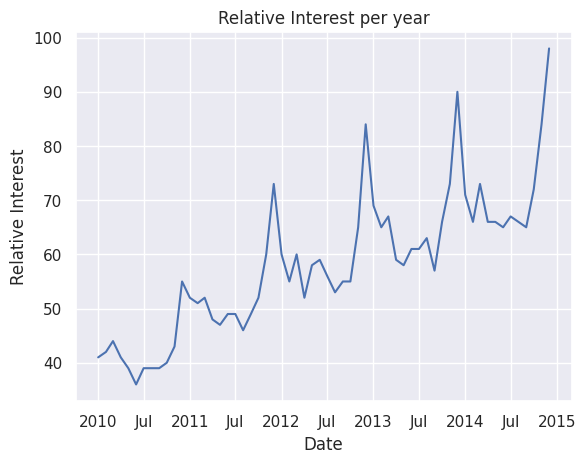

In [120]:
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.plot(train_whiskey['ds'], train_whiskey['y'])
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.title('Relative Interest per year')
plt.show()


Text(0.5, 1.0, 'Autocorrelation Plot')

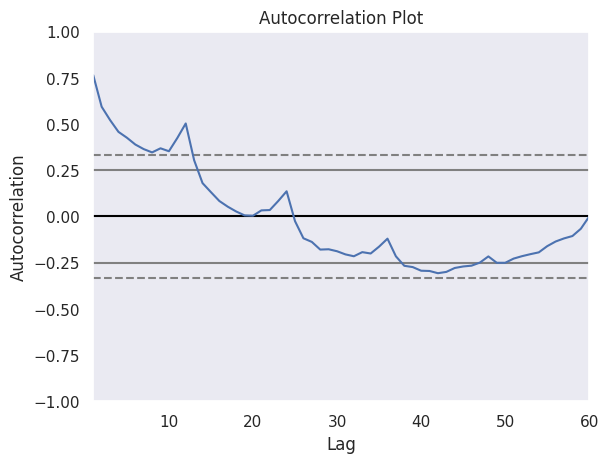

In [121]:
data_wh = np.array(train_whiskey['y'])
autocorrelation_plot(data_wh)
plt.title('Autocorrelation Plot')

In [122]:
pred_wh = pd.DataFrame(test_whiskey['ds'])
pred_wh= pred.reset_index(drop = True)
h_max_wh=12
m_wh=12
T_wh = len(train_whiskey)
yT_wh = train_whiskey['y'][len(train_whiskey) - 1]
y1_wh = train_whiskey['y'][0]
pred_wh['mean_baseline'] = train_whiskey['y'].mean()
pred_wh['naive_baseline'] = yT_wh
print(h_max_wh,m_wh,T_wh,yT_wh,y1_wh)

12 12 60 98 41


In [123]:
pred_list_wh = []
for h in range(1, h_max_wh + 1):
  k = math.floor((h - 1)/m_wh)
  index = T_wh + h - m_wh * (k + 1)
  pred_list_wh.append(whiskey['y'][index - 1])
pred_wh['seasonal_naive_baseline'] = pred_list_wh
pred_list_wh

[71, 66, 73, 66, 66, 65, 67, 66, 65, 72, 84, 98]

In [124]:
drift_list_wh = []
for h in range(1, h_max_wh+1):
  result = yT_wh + h * ((yT_wh-y1_wh) / T_wh-1)
  drift_list_wh.append(result)
pred_wh['drift_baseline'] = drift_list_wh
drift_list_wh

[97.95, 97.9, 97.85, 97.8, 97.75, 97.7, 97.65, 97.6, 97.55, 97.5, 97.45, 97.4]

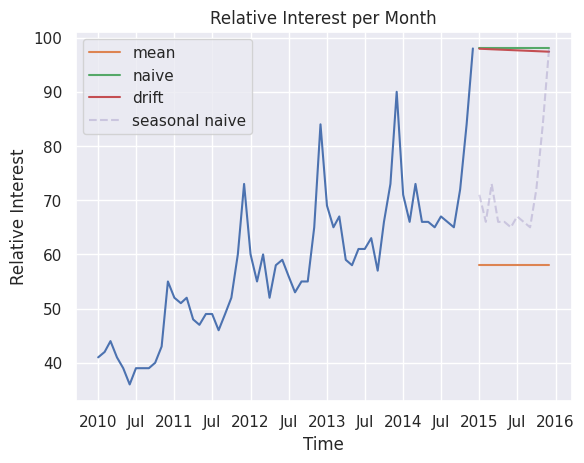

In [125]:
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)


plt.plot(train_whiskey['ds'], train_whiskey['y'])
plt.plot(pred_wh['ds'], pred_wh['mean_baseline'], label = 'mean')
plt.plot(pred_wh['ds'], pred_wh['naive_baseline'], label = 'naive')
plt.plot(pred_wh['ds'], pred_wh['drift_baseline'], label = 'drift')
plt.plot(pred_wh['ds'], pred_wh['seasonal_naive_baseline'], label = 'seasonal naive', linestyle = '--', alpha = 0.3)
plt.xlabel('Time')
plt.ylabel('Relative Interest')
plt.title('Relative Interest per Month')
plt.legend()
plt.show()

In [ ]:
Baseline methods for the white wine

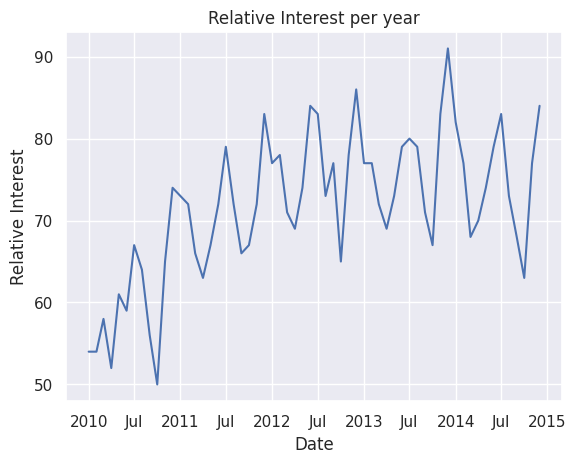

In [126]:
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.plot(train_wine['ds'], train_wine['y'])
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.title('Relative Interest per year')
plt.show()


Text(0.5, 1.0, 'Autocorrelation Plot')

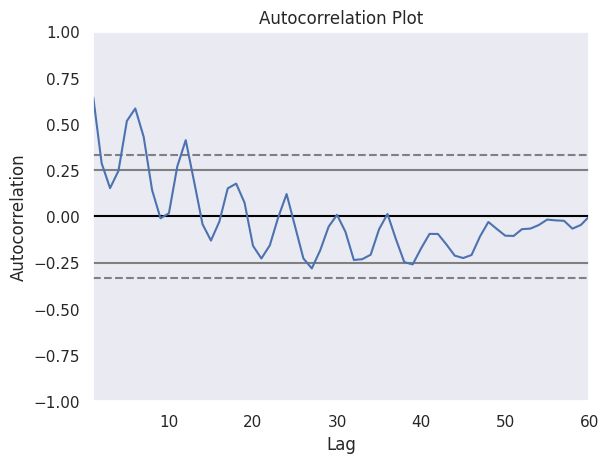

In [127]:
data_w = np.array(train_wine['y'])
autocorrelation_plot(data_w)
plt.title('Autocorrelation Plot')

In [128]:
pred_w = pd.DataFrame(test_wine['ds'])
pred_w= pred.reset_index(drop = True)
h_max_w=12*1
m_w=12*1
T_w = len(train_wine)
yT_w = train_wine['y'][len(train_wine) - 1]
y1_w = train_wine['y'][0]
pred_w['mean_baseline'] = train_wine['y'].mean()
pred_w['naive_baseline'] = yT_w
print(yT_w,y1_w,h_max_w,m_w)

84 54 12 12


In [129]:
pred_w['mean_baseline']

0     71.616667
1     71.616667
2     71.616667
3     71.616667
4     71.616667
5     71.616667
6     71.616667
7     71.616667
8     71.616667
9     71.616667
10    71.616667
11    71.616667
Name: mean_baseline, dtype: float64

In [130]:
pred_list_w = []
for h in range(1, h_max_w + 1):
  k = math.floor((h - 1)/m_w)
  index = T_w + h - m_w * (k + 1)
  pred_list_w.append(wine['y'][index - 1])
pred_w['seasonal_naive_baseline'] = pred_list_w
pred_list_w

[82, 77, 68, 70, 74, 79, 83, 73, 68, 63, 77, 84]

In [131]:
drift_list_w = []
for h in range(1, h_max_w+1):
  result = yT_w + h * ((yT_w-y1_w) / T_w-1)
  drift_list_w.append(result)
pred_w['drift_baseline'] = drift_list_w
drift_list_w

[83.5, 83.0, 82.5, 82.0, 81.5, 81.0, 80.5, 80.0, 79.5, 79.0, 78.5, 78.0]

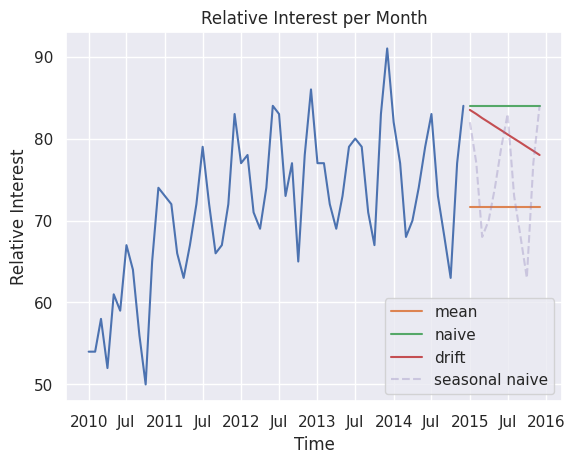

In [132]:
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)


plt.plot(train_wine['ds'], train_wine['y'])
plt.plot(pred_w['ds'], pred_w['mean_baseline'], label = 'mean')
plt.plot(pred_w['ds'], pred_w['naive_baseline'], label = 'naive')
plt.plot(pred_w['ds'], pred_w['drift_baseline'], label = 'drift')
plt.plot(pred_w['ds'], pred_w['seasonal_naive_baseline'], label = 'seasonal naive', linestyle = '--', alpha = 0.3)
plt.xlabel('Time')
plt.ylabel('Relative Interest')
plt.title('Relative Interest per Month')
plt.legend()
plt.show()